In [ ]:
import tqdm
import pickle
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split

In [ ]:
data= pd.read_excel('/content/drive/MyDrive/Hastings/data.xlsx')

In [ ]:
print("Number of cliams in the dataset: ",data.shape[0])
print("Number of Features in the dataset: ",data.shape[1])

Number of cliams in the dataset:  7691
Number of Features in the dataset:  46


In [ ]:
data_cols= list(data.columns)
data_cols

In [ ]:
cat_cols= data.select_dtypes(['object_']).columns
num_cols= data.select_dtypes(['number']).columns

print("Number of Categorical columns in the dataset: ", len(cat_cols))
print("Number of Numerical columns in the dataset: ", len(num_cols))

Number of Categorical columns in the dataset:  9
Number of Numerical columns in the dataset:  37


In [ ]:
na_perc= pd.DataFrame(np.round((data.isna().sum()/data.shape[0])*100,2))
na_perc.reset_index(inplace=True)
na_perc.columns= ['col_name','na_perc']
na_perc

,col_name,na_perc
0,Claim Number,0.00
1,date_of_loss,0.00
2,Notifier,0.00
3,Loss_code,0.00
4,Loss_description,0.00
5,Notification_period,0.00
6,Inception_to_loss,0.00
7,Location_of_incident,0.00
8,Weather_conditions,4.49
9,Vehicle_mobile,0.00


In [ ]:
reg_cols= data_cols[32:44]
region= []
exep=[]
exep_sum=[]
for i in range(data.shape[0]):
    if data.iloc[i,32:44].sum()==1:
        for j in region:
            if data.loc[i,j]==1:
                region.append(data.loc[i,j].split('_')[2])
    else: 
        exep.append(i)
        exep_sum.append(data.iloc[i,32:44].sum())        

In [ ]:
d= {'exep_ind':exep,'exep_sum': exep_sum}
data_exep= pd.DataFrame(d)
data_exep.head(10)

,exep_ind,exep_sum
0,4,0
1,5,0
2,8,0
3,13,0
4,14,0
5,16,0
6,21,2
7,22,0
8,26,0
9,27,0


In [ ]:
np.round((data_exep['exep_sum'].value_counts()/data.shape[0])*100,2)

0    48.20
2     6.70
3     2.09
4     0.74
5     0.36
6     0.16
7     0.04
9     0.03
8     0.03
Name: exep_sum, dtype: float64

In [ ]:
new_list=[]
for i in range(data.shape[0]):
    if data['Capped Incurred'][i]!=data['Incurred'][i]:
        new_list.append(i)
print(len(new_list))

198


## Analysis of the Date_of_loss column (Univariate Analysis)

In [ ]:
data['date_of_loss']= pd.to_datetime(data['date_of_loss'])

In [ ]:
print("Starting date:", data['date_of_loss'].min())
print("Ending date:", data['date_of_loss'].max())

Starting date: 2003-04-15 00:00:00
Ending date: 2015-06-30 00:00:00


In [ ]:
data['year_loss']= pd.to_datetime(data['date_of_loss']).dt.year
data['month_loss']= pd.to_datetime(data['date_of_loss']).dt.month
data['day_loss']= pd.to_datetime(data['date_of_loss']).dt.day

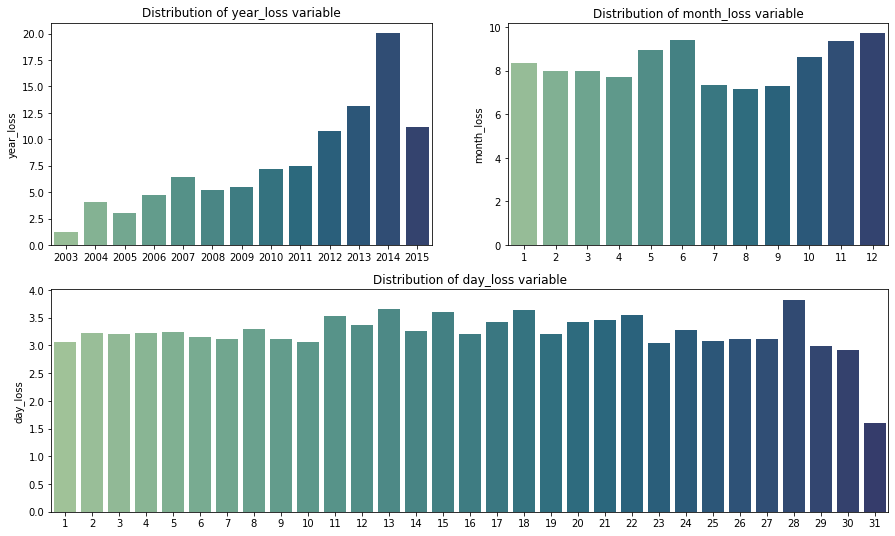

In [ ]:
fig= plt.figure(figsize=(15,9))
gs= GridSpec(2,2, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

uni_ml= np.round((data['month_loss'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax2, x=uni_ml.index, y=uni_ml,palette='crest')

uni_yl= np.round((data['year_loss'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax1, x=uni_yl.index, y=uni_yl,palette='crest')

uni_dl= np.round((data['day_loss'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax3, x=uni_dl.index, y=uni_dl,palette='crest')

ax1.title.set_text("Distribution of year_loss variable")
ax2.title.set_text("Distribution of month_loss variable")
ax3.title.set_text("Distribution of day_loss variable")

plt.show()

In [ ]:
data['year_loss'].value_counts().sort_index()

2003      94
2004     311
2005     231
2006     366
2007     496
2008     403
2009     424
2010     550
2011     576
2012     829
2013    1012
2014    1542
2015     857
Name: year_loss, dtype: int64

In [ ]:
print("Percentage of Data Points in years 2014 and 2015: ",np.round(((857+1542)/7691)*100,2))
print("Percentage of Data Points in the remaining years: ",np.round(((7691-857-1542)/7691)*100,2))

Percentage of Data Points in years 2014 and 2015:  31.19
Percentage of Data Points in the remaining years:  68.81


In [ ]:
months=[]
grp= data.groupby(['year_loss'])
for i in range(data['year_loss'].min(),data['year_loss'].max()+1):
    months.append(len(grp.get_group(i)['month_loss'].unique()))
print(months)

[9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6]


In [ ]:
data.drop(['date_of_loss'], axis=1, inplace=True)

## Cheking for Low or Zero variance aross the columns

In [ ]:
data['Loss_code'].value_counts()

LD003    7691
Name: Loss_code, dtype: int64

In [ ]:
data['Loss_description'].value_counts()

Head on collision    7691
Name: Loss_description, dtype: int64

In [ ]:
data['Vechile_registration_present'].value_counts()

1    7685
0       6
Name: Vechile_registration_present, dtype: int64

#### Dropping the Columns (Loss_code, Loss_description and Vechicle_regstration_present) due to low or zero variance within the columns

In [ ]:
data.drop(['Loss_code','Loss_description','Vechile_registration_present'],axis=1,inplace=True)

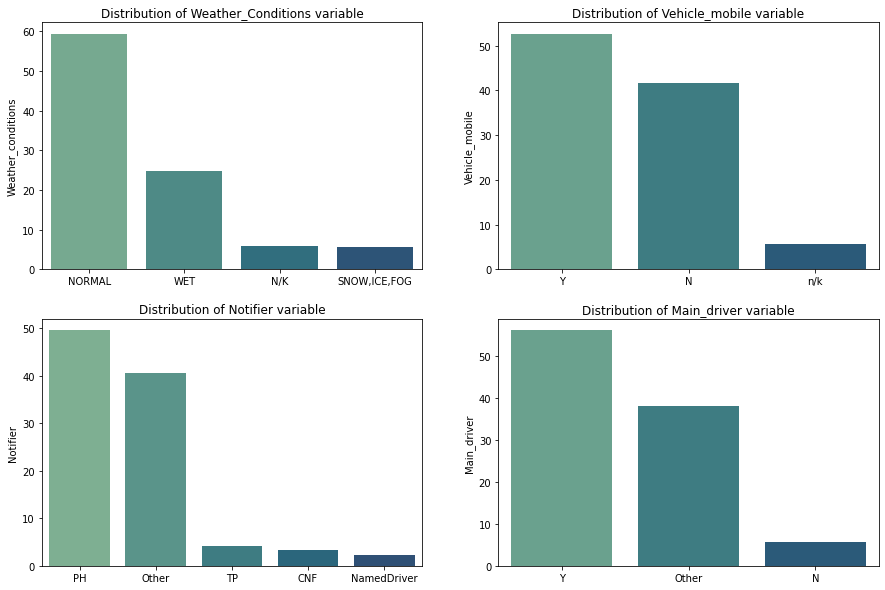

In [ ]:
fig= plt.figure(figsize=(15,10))
gs= GridSpec(2,2, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,0])
ax4= fig.add_subplot(gs[1,1])

uni_wc_vc= np.round((data['Weather_conditions'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax1, x=uni_wc_vc.index, y=uni_wc_vc,palette='crest')

uni_vm_vc= np.round((data['Vehicle_mobile'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax2, x=uni_vm_vc.index, y=uni_vm_vc,palette='crest')

uni_nf_vc= np.round((data['Notifier'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax3, x=uni_nf_vc.index, y=uni_nf_vc,palette='crest')

uni_md_vc= np.round((data['Main_driver'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax4, x=uni_md_vc.index, y=uni_md_vc,palette='crest')

ax1.title.set_text("Distribution of Weather_Conditions variable")
ax2.title.set_text("Distribution of Vehicle_mobile variable")
ax3.title.set_text("Distribution of Notifier variable")
ax4.title.set_text("Distribution of Main_driver variable")

plt.show()

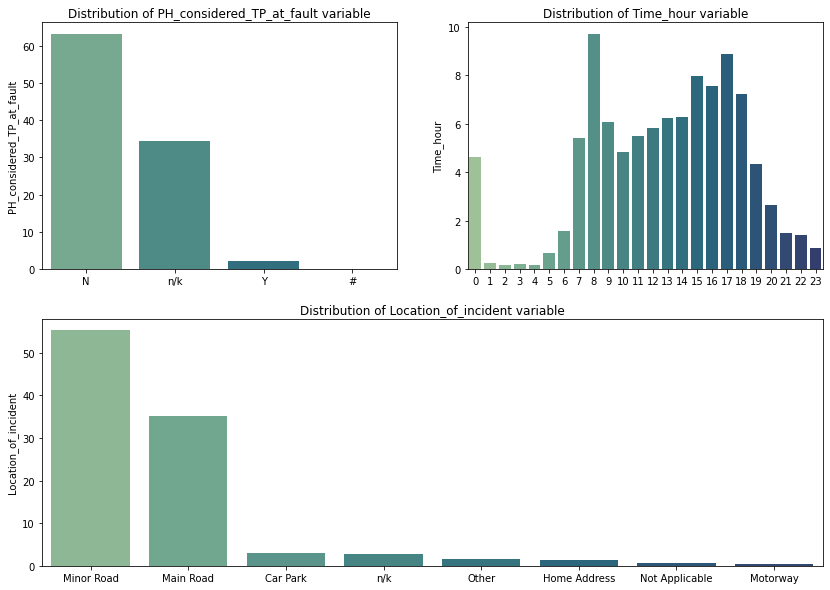

In [ ]:
fig= plt.figure(figsize=(14,10))
gs= GridSpec(2,2, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])


uni_ph_vc= np.round((data['PH_considered_TP_at_fault'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax1,x=uni_ph_vc.index, y=uni_ph_vc,palette='crest')

uni_th_vc= np.round((data['Time_hour'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax2,x=uni_th_vc.index, y=uni_th_vc,palette='crest')

uni_li_vc= np.round((data['Location_of_incident'].value_counts()/data.shape[0])*100,2)
sns.barplot(ax=ax3,x=uni_li_vc.index, y=uni_li_vc,palette='crest')

ax1.title.set_text("Distribution of PH_considered_TP_at_fault variable")
ax2.title.set_text("Distribution of Time_hour variable")
ax3.title.set_text("Distribution of Location_of_incident variable")

plt.show()

### Data Cleansing: PH_considered_TP_at_fault variable


In [ ]:
data= data[data['PH_considered_TP_at_fault']!='#']

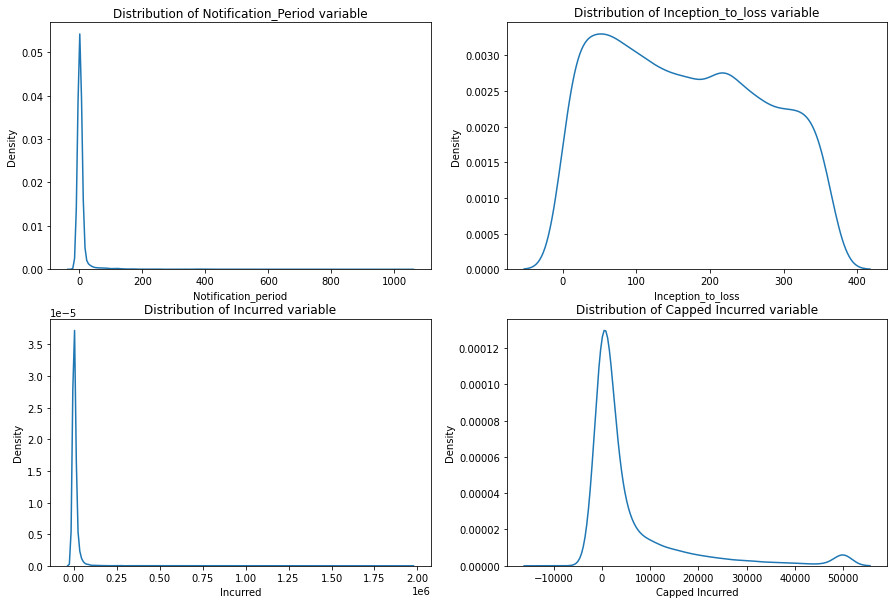

In [ ]:
fig= plt.figure(figsize=(15,10))
gs= GridSpec(2,2, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,0])
ax4= fig.add_subplot(gs[1,1])

sns.kdeplot(ax=ax1,data=data, x='Notification_period')

sns.kdeplot(ax=ax2,data=data, x='Inception_to_loss')

sns.kdeplot(ax=ax3,data=data, x='Incurred',palette='crest')

sns.kdeplot(ax=ax4,data=data, x='Capped Incurred',palette='crest')

ax1.title.set_text("Distribution of Notification_Period variable")
ax2.title.set_text("Distribution of Inception_to_loss variable")
ax3.title.set_text("Distribution of Incurred variable")
ax4.title.set_text("Distribution of Capped Incurred variable")

plt.show()

###Data Cleansing: Notification_Period

In [ ]:
data['Notification_period'].describe()

count    7691.000000
mean        7.163438
std        39.138209
min       -18.000000
25%         0.000000
50%         1.000000
75%         2.000000
max      1042.000000
Name: Notification_period, dtype: float64

In [ ]:
print("Number of Observations with Negative Notification_Period: ", data[data['Notification_period']<0].shape[0])

Number of Observations with Negative Notification_Period:  3


Definition of Notification_period:The amount of time after the incurral of a claim during which an insurance company will accept a notification of a claim. Claims received by an insurer after the end of the claim notification period may not be eligible for payment, or may be paid at a reduced rate.

Source: https://actuarialtoolkit.soa.org/tool/glossary/claim-notification-period

In [ ]:
data= data[data['Notification_period']>=0]

In [ ]:
data['PH_considered_TP_at_fault'].value_counts()

N      4852
n/k    2654
Y       181
#         1
Name: PH_considered_TP_at_fault, dtype: int64

#Univariate Analysis of the Third Party related features

## Analysis of the "Type" related variable 

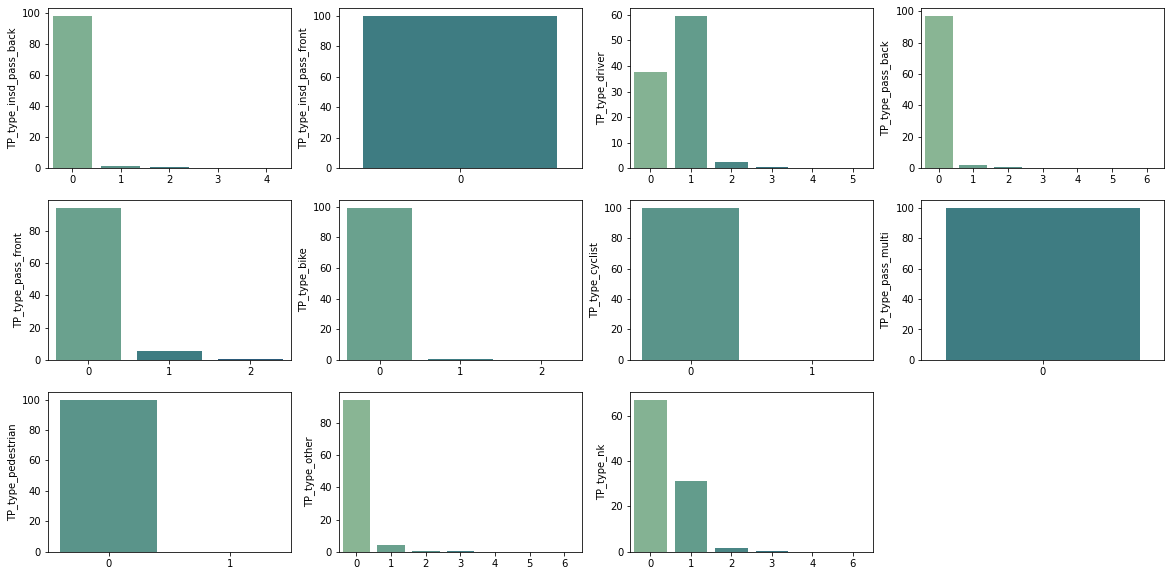

In [ ]:
type_cols= data_cols[16:27]

count=1
plt.subplots(figsize=(20,10))
for i in type_cols:
    plt.subplot(3,4,count)
    uni_tc= np.round((data[i].value_counts()/data.shape[0])*100,2) 
    sns.barplot(x=uni_tc.index, y=uni_tc,palette='crest')
    count+=1

plt.show()

In [ ]:
print(data['TP_type_insd_pass_front'].value_counts())
print("="*50)
print(data['TP_type_bike'].value_counts())
print("="*50)
print(data['TP_type_cyclist'].value_counts())
print("="*50)
print(data['TP_type_pass_multi'].value_counts())
print("="*50)
print(data['TP_type_pedestrian'].value_counts())

0    7691
Name: TP_type_insd_pass_front, dtype: int64
0    7637
1      52
2       2
Name: TP_type_bike, dtype: int64
0    7687
1       4
Name: TP_type_cyclist, dtype: int64
0    7691
Name: TP_type_pass_multi, dtype: int64
0    7690
1       1
Name: TP_type_pedestrian, dtype: int64


### Data cleansing: 'TP_type_insd_pass_front','TP_type_cyclist','TP_type_pass_multi','TP_type_pedestrian variables

#### Dropping the "Type" related variables with Zero or Near Zero varaince within them

In [ ]:
data.drop(['TP_type_insd_pass_front','TP_type_cyclist','TP_type_pass_multi','TP_type_pedestrian'],axis=1,inplace=True)

In [ ]:
type_cols= list(set(type_cols)- set(['TP_type_insd_pass_front','TP_type_cyclist','TP_type_pass_multi','TP_type_pedestrian']))

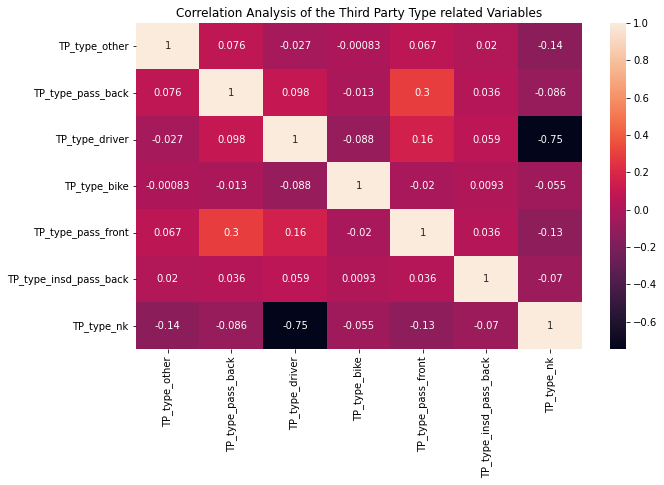

In [ ]:
type_df= data[type_cols]
type_corr= type_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(type_corr, annot=True)

plt.title('Correlation Analysis of the Third Party Type related Variables')
plt.show()

##Univariate Analysis

### Analysis of the "Injury" related variables 

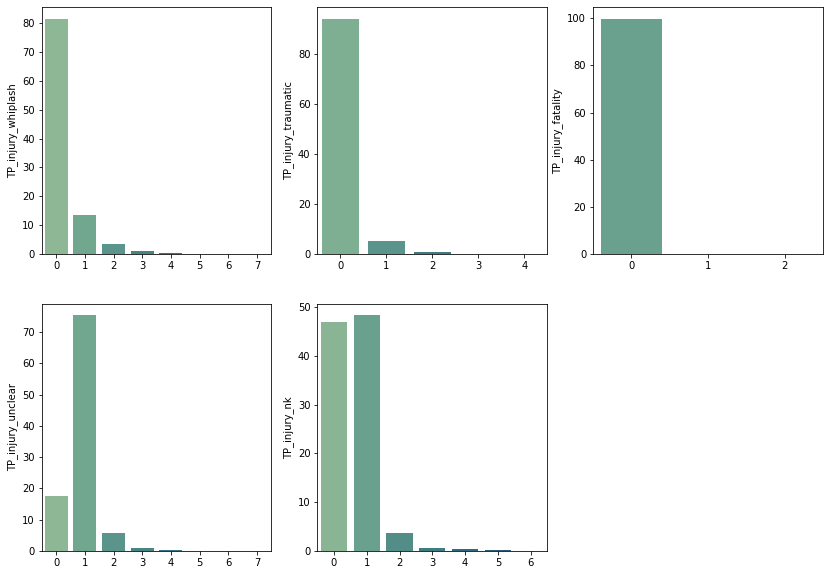

In [ ]:
injury_cols= data_cols[27:32]

count=1
plt.subplots(figsize=(14,10))
for i in injury_cols:
    plt.subplot(2,3,count)
    uni_ij= np.round((data[i].value_counts()/data.shape[0])*100,2) 
    sns.barplot(x=uni_ij.index, y=uni_ij,palette='crest')
    count+=1

plt.show()

In [ ]:
data['TP_injury_fatality'].value_counts()

0    7665
1      24
2       2
Name: TP_injury_fatality, dtype: int64

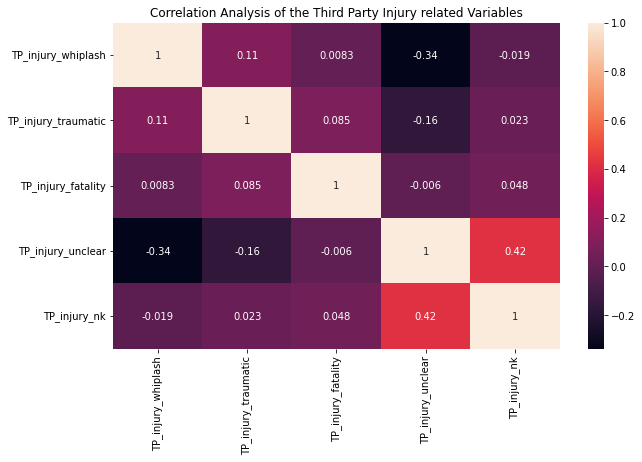

In [ ]:
injury_df= data[injury_cols]
injury_corr= injury_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(injury_corr, annot=True)

plt.title('Correlation Analysis of the Third Party Injury related Variables')
plt.show()

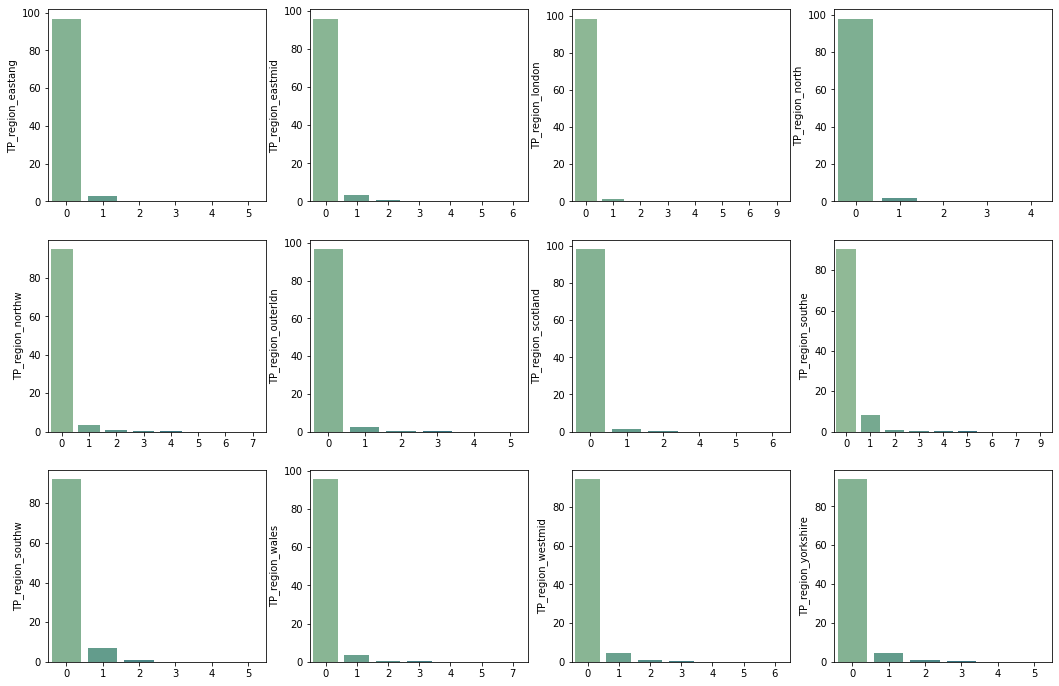

In [ ]:
region_cols= data_cols[32:44]

count=1
plt.subplots(figsize=(18,12))
for i in region_cols:
    plt.subplot(3,4,count)
    uni_rg= np.round((data[i].value_counts()/data.shape[0])*100,2) 
    sns.barplot(x=uni_rg.index, y=uni_rg,palette='crest')
    count+=1

plt.show()

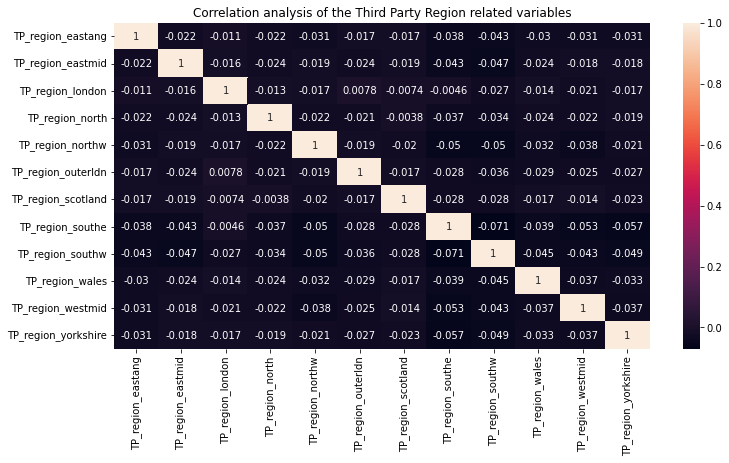

In [ ]:
region_df= data[region_cols]
region_corr= region_df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(region_corr, annot=True)

plt.title("Correlation analysis of the Third Party Region related variables")
plt.show()

In [ ]:
with open('/content/drive/MyDrive/Hastings/data1.pkl','wb') as data1:
    pickle.dump(data,data1)

In [ ]:
with open('/content/drive/MyDrive/Hastings/data1.pkl','rb') as data1:
    data= pickle.load(data1)

In [ ]:
cat_cols_new= data.select_dtypes(['object_']).columns
num_cols_new= data.select_dtypes(['number']).columns

In [ ]:
num_cols_new

Index(['Claim Number', 'Notification_period', 'Inception_to_loss', 'Time_hour',
       'Incident_details_present', 'Injury_details_present',
       'TP_type_insd_pass_back', 'TP_type_driver', 'TP_type_pass_back',
       'TP_type_pass_front', 'TP_type_bike', 'TP_type_other', 'TP_type_nk',
       'TP_injury_whiplash', 'TP_injury_traumatic', 'TP_injury_fatality',
       'TP_injury_unclear', 'TP_injury_nk', 'TP_region_eastang',
       'TP_region_eastmid', 'TP_region_london', 'TP_region_north',
       'TP_region_northw', 'TP_region_outerldn', 'TP_region_scotland',
       'TP_region_southe', 'TP_region_southw', 'TP_region_wales',
       'TP_region_westmid', 'TP_region_yorkshire', 'Incurred',
       'Capped Incurred', 'year_loss', 'month_loss', 'day_loss'],
      dtype='object')

## Multivariate Analysis

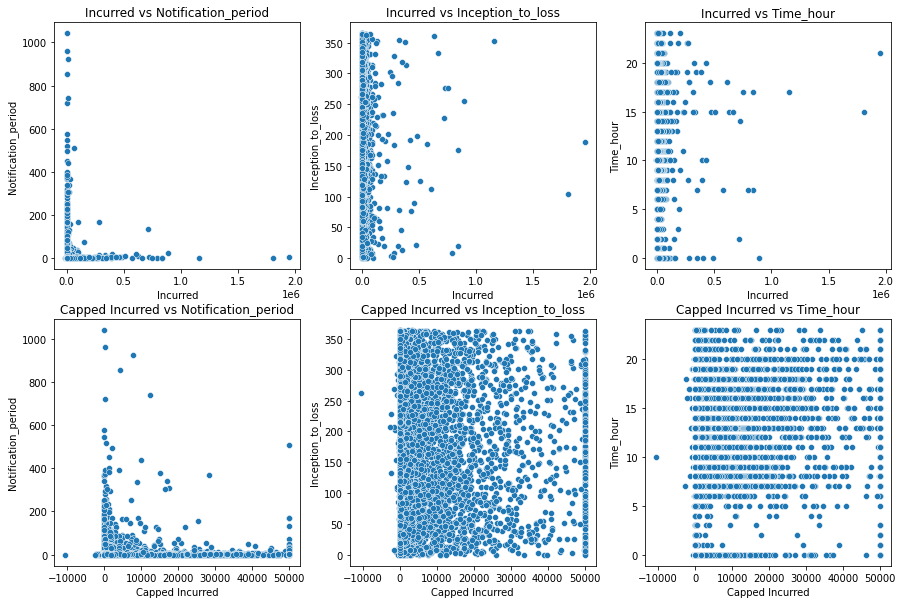

In [ ]:
fig= plt.figure(figsize=(15,10))
gs= GridSpec(2,3, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[0,2])
ax4= fig.add_subplot(gs[1,0])
ax5= fig.add_subplot(gs[1,1])
ax6= fig.add_subplot(gs[1,2])

sns.scatterplot(ax=ax1, x ="Incurred",y="Notification_period",data=data,palette='crest')

sns.scatterplot(ax=ax2, x ="Incurred",y="Inception_to_loss",data=data,palette='crest')

sns.scatterplot(ax=ax3, x ="Incurred",y="Time_hour",data=data,palette='crest')

sns.scatterplot(ax=ax4, x ="Capped Incurred",y="Notification_period",data=data,palette='crest')

sns.scatterplot(ax=ax5, x ="Capped Incurred",y="Inception_to_loss",data=data,palette='crest')

sns.scatterplot(ax=ax6, x ="Capped Incurred",y="Time_hour",data=data,palette='crest')

ax1.title.set_text("Incurred vs Notification_period")
ax2.title.set_text("Incurred vs Inception_to_loss")
ax3.title.set_text("Incurred vs Time_hour")

ax4.title.set_text("Capped Incurred vs Notification_period")
ax5.title.set_text("Capped Incurred vs Inception_to_loss")
ax6.title.set_text("Capped Incurred vs Time_hour")

plt.show()

In [ ]:
cat_cols_new

Index(['Notifier', 'Location_of_incident', 'Weather_conditions',
       'Vehicle_mobile', 'Main_driver', 'PH_considered_TP_at_fault'],
      dtype='object')

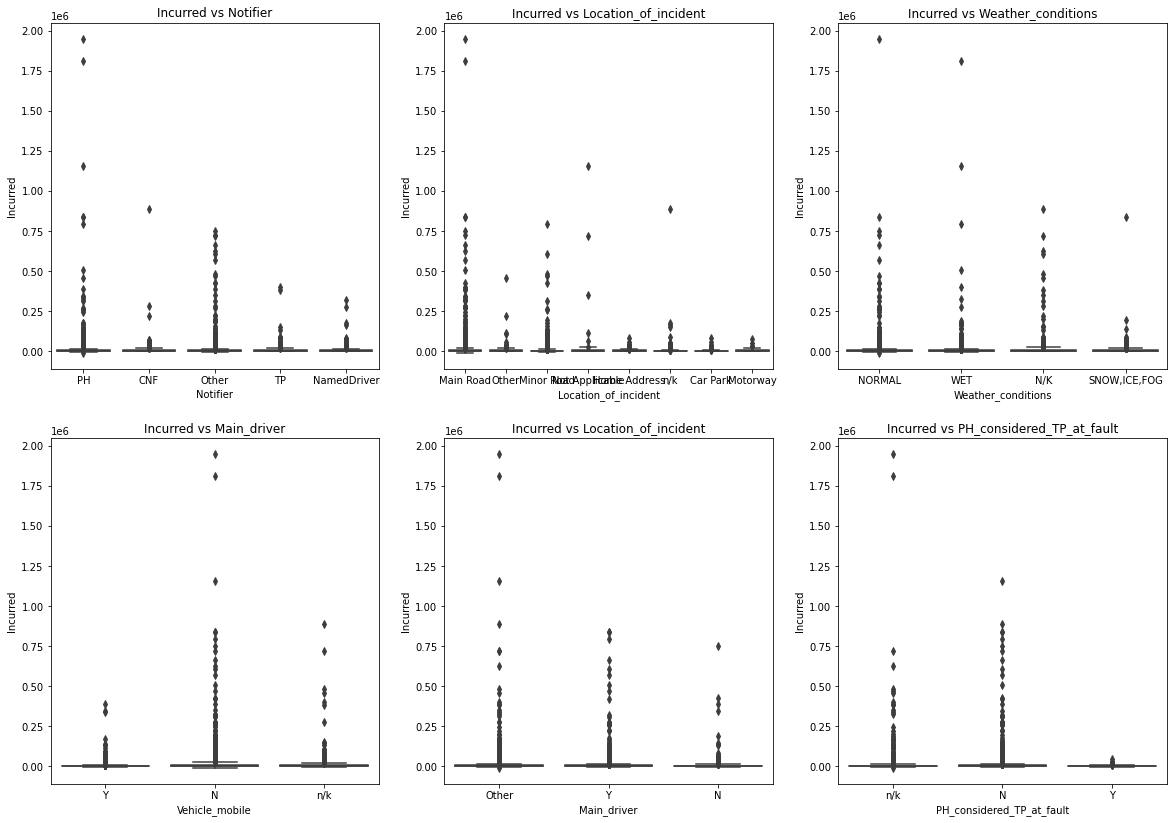

In [ ]:
fig= plt.figure(figsize=(20,14))
gs= GridSpec(2,3, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[0,2])
ax4= fig.add_subplot(gs[1,0])
ax5= fig.add_subplot(gs[1,1])
ax6= fig.add_subplot(gs[1,2])

sns.boxplot(ax=ax1, y ="Incurred",x="Notifier",data=data)

sns.boxplot(ax=ax2, y ="Incurred",x="Location_of_incident",data=data)

sns.boxplot(ax=ax3, y ="Incurred",x="Weather_conditions",data=data)

sns.boxplot(ax=ax4, y ="Incurred",x="Vehicle_mobile",data=data)

sns.boxplot(ax=ax5, y ="Incurred",x="Main_driver",data=data)

sns.boxplot(ax=ax6, y ="Incurred",x="PH_considered_TP_at_fault",data=data)

ax1.title.set_text("Incurred vs Notifier")
ax2.title.set_text("Incurred vs Location_of_incident")
ax3.title.set_text("Incurred vs Weather_conditions")

ax4.title.set_text("Incurred vs Main_driver")
ax5.title.set_text("Incurred vs Location_of_incident")
ax6.title.set_text("Incurred vs PH_considered_TP_at_fault")

plt.show()

In [ ]:
data.drop(['Claim Number'], axis=1, inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
with open('/content/drive/MyDrive/Hastings/data1.pkl','wb') as data1:
    pickle.dump(data,data1)

In [ ]:
with open('/content/drive/MyDrive/Hastings/data1.pkl','rb') as data1:
    data= pickle.load(data1)

In [ ]:
data.head()

,Notifier,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred,year_loss,month_loss,day_loss
0,PH,22,13,Main Road,NORMAL,Y,10,Other,n/k,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.000000,2003,4,15
1,CNF,1,9,Main Road,WET,Y,18,Other,n/k,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2801.308013,2801.308013,2003,4,20
2,CNF,5,17,Main Road,WET,Y,16,Y,n/k,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1220.870390,1220.870390,2003,4,24
3,CNF,1,23,Main Road,N/K,Y,14,Other,n/k,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3529.868026,3529.868026,2003,5,13
4,CNF,1,48,Other,N/K,N,9,Other,n/k,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3155.987923,3155.987923,2003,6,11


### Imputation of the Missing Values using SimpleImputer

In [ ]:
imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Weather_conditions']= imputer.fit_transform(np.array(data['Weather_conditions']).reshape(-1,1))

In [ ]:
data['year_loss'].value_counts().sort_index()

2003      94
2004     311
2005     231
2006     366
2007     496
2008     403
2009     424
2010     550
2011     576
2012     829
2013    1012
2014    1539
2015     856
Name: year_loss, dtype: int64

### Temporal Split of the Dataset into the Train-Test Split. Train data(all the records from 2003 to 2013), Test(Records from 2014 and 2015)

In [ ]:
train_data= data[data['year_loss']<2014]
test_data= data[data['year_loss']>=2014]

print("Number of Observations in the Train Data: ", train_data.shape[0])
print("Number of Observations in the Test Data: ", test_data.shape[0])

Number of Observations in the Train Data:  5292
Number of Observations in the Test Data:  2395


In [ ]:
with open('/content/drive/MyDrive/Hastings/train_data.pkl','wb') as traindata:
    pickle.dump(train_data,traindata)
with open('/content/drive/MyDrive/Hastings/test_data.pkl','wb') as testdata:
    pickle.dump(test_data,testdata)

### Analysis of the Incurred and Capped Incurred Variables in order to check the correlation between the variables

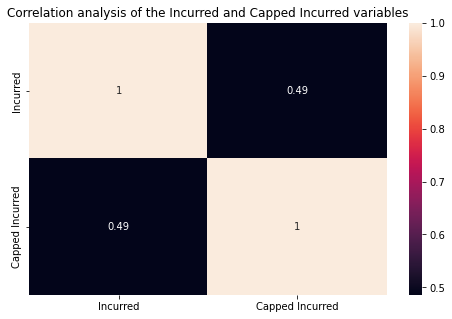

In [ ]:
df_y= data[['Incurred','Capped Incurred']]
y_corr= df_y.corr()

plt.figure(figsize=(8,5))
sns.heatmap(y_corr, annot=True)

plt.title("Correlation analysis of the Incurred and Capped Incurred variables")
plt.show()

#### Looking at the KS-Statistic Metric in order to compare the distributions of Incurred and Capped Incurred variables

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(data['Incurred'], data['Capped Incurred'])

Ks_2sampResult(statistic=0.02575777286327566, pvalue=0.012190182776784964)